In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

### imports

In [2]:
print(__doc__)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tqdm.notebook import tqdm
from sklearn.preprocessing import normalize
from sklearn.datasets import fetch_20newsgroups
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

Automatically created module for IPython interactive environment


### utilities

In [3]:
def sigmoid(x):
    return 1 / (1 + (np.e**-x))

def infer_topic(doc_vector, topic_word_distr):
    doc_topic_word_distr = topic_word_distr.copy()
    doc_word_freq_norm = (doc_vector > 0).astype(int)
#     doc_word_freq_norm = doc_vector / doc_vector.sum() if doc_vector.sum() else 0

    for label_class in label_classes:
        doc_topic_word_distr[label_class] *= doc_word_freq_norm
    
    
    doc_topic = np.max(doc_topic_word_distr).idxmax()
    return doc_topic_word_distr, doc_topic

### load dataset

In [49]:
# total number of samples needed
datasize = 3000

# retrieve dataset
docs = fetch_20newsgroups(subset='train', shuffle=False, remove=('headers', 'footers', 'quotes'))
docs, old_labels, classes = docs.data[:datasize], docs.target[:datasize], docs.target_names

In [50]:
# the actual labels as np array
old_labels = np.array(old_labels)
labels = np.zeros(old_labels.shape, dtype=int)

# the new classes
label_classes = list(set([x.split('.')[0] for x in classes]))

# restructuring classes  from 19 to less
for label, cl in enumerate(classes):
    labels[old_labels == label] = label_classes.index(cl.split('.')[0])

In [51]:
print(f"there are {len(docs)} docs and {len(label_classes)} classes: {label_classes}")

there are 3000 docs and 7 classes: ['comp', 'talk', 'alt', 'rec', 'sci', 'soc', 'misc']


### clean dataset

In [52]:
# clean out the new line characters from text in docs
def clean_doc(doc):
    ''' remove unwanter characters line new line '''

    unwanted_chrs = [')', '(', '{', '}', '\t', '\n', '\r', "'", '"', "!"]
    doc = doc.lower()
    for unwanted_chr in unwanted_chrs:
        doc = doc.replace(unwanted_chr, ' ')

    return doc.strip()

clean_docs = [clean_doc(doc) for doc in docs]
clean_docs[0]

'morgan and guzman will have era s 1 run higher than last year, and  the cubs will be idiots and not pitch harkey as much as hibbard.  castillo won t be good  i think he s a stud pitcher'

### count words

In [53]:
# initialize the count vectorizer
count_vectorizer = CountVectorizer()
# count_vectorizer = TfidfVectorizer()

# fit it to dataset
count_vectorizer.fit(clean_docs)
vocabulary = count_vectorizer.get_feature_names()

print("word_count is", len(vocabulary))

word_count is 37782


### Prepare Datatset

In [158]:
# create doc count vectors
doc_vectors = count_vectorizer.transform(clean_docs).toarray()
doc_vectors = normalize(doc_vectors, norm="l1", axis=1)
doc_vectors = normalize(doc_vectors, norm="l1", axis=0)


train_doc_vectors, test_doc_vectors, train_labels, test_labels = train_test_split(doc_vectors, labels, test_size=.33, random_state=42)
print(f"{len(train_labels)} train_docs, {len(test_labels)} test docs")

2010 train_docs, 990 test docs


In [159]:
document_word_frequency = pd.DataFrame(train_doc_vectors, columns=count_vectorizer.get_feature_names())
document_word_binary_frequency = (document_word_frequency > 0).astype('int')

document_word_frequency["__labels__"] = train_labels
document_word_binary_frequency["__labels__"] = train_labels

print("document_word_frequency shape is", document_word_frequency.shape)

document_word_frequency shape is (2010, 37783)


In [160]:
print(f"there are {len(clean_docs)} docs and {len(label_classes)} classes")

there are 3000 docs and 7 classes


In [161]:
document_word_frequency.head()

,00,000,0000,00000,00000000,00000000b,00000001,00000001b,00000010,00000010b,...,zurich,zvb,zx,zx900a,zygot,zymmr,zyxel1496b,zzz,zzzzzz,__labels__
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3


In [162]:
document_word_binary_frequency.head()

,00,000,0000,00000,00000000,00000000b,00000001,00000001b,00000010,00000010b,...,zurich,zvb,zx,zx900a,zygot,zymmr,zyxel1496b,zzz,zzzzzz,__labels__
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3


### Prepare Binary Dataset

In [163]:
#reduce freq in doc to bin value of 1 or 0
# word_doc_binary_freqency = document_word_binary_frequency.drop(["__labels__"], axis='columns')
word_doc_binary_freqency = document_word_frequency.drop(["__labels__"], axis='columns')

#the sum vertically of bin freq
word_doc_frequency = word_doc_binary_freqency.sum(0) 

### Topic and word corelation

In [164]:
topic_word_distr = pd.DataFrame(data=0.0, columns=label_classes, index=vocabulary)

for topic, label in enumerate(label_classes):
    word_topic_frequency = word_doc_binary_freqency[document_word_frequency['__labels__'] == topic].sum(0)
    trust_factor = sigmoid(word_doc_frequency)
    
    topic_word_distr[label] = ((word_topic_frequency * trust_factor) / word_doc_frequency).fillna(0)
    
print(f"topic_word_distr has shape {topic_word_distr.shape}")

topic_word_distr has shape (37782, 7)


In [165]:
topic_word_distr.head()

,comp,talk,alt,rec,sci,soc,misc
00,0.058109,0.053486,0.000000,0.106384,0.045255,0.0,0.417655
000,0.007595,0.157271,0.030498,0.337858,0.055730,0.0,0.107640
0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
00000000,0.000000,0.000000,0.000000,0.000000,0.731059,0.0,0.000000


In [166]:
label_classes

['comp', 'talk', 'alt', 'rec', 'sci', 'soc', 'misc']

In [167]:
label_class = 'comp'
topic_word_distr[label_class][topic_word_distr[label_class] > 0].sort_values(ascending=False)

zyxel1496b    0.731059
hiccup        0.731059
hds           0.731059
hdt           0.731059
hdu           0.731059
                ...   
safety        0.000344
dr            0.000322
house         0.000313
evidence      0.000262
beat          0.000233
Name: comp, Length: 11015, dtype: float64

In [168]:
word="the"
topic_word_distr.loc[word].sort_values(ascending=False)

sci     0.160480
comp    0.151761
rec     0.142749
talk    0.124923
soc     0.034441
alt     0.028705
misc    0.018538
Name: the, dtype: float64

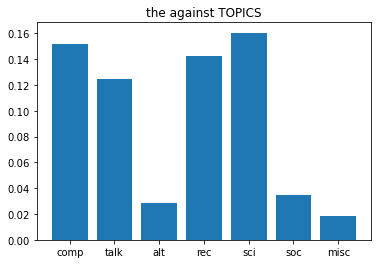

In [169]:
plt.title(f"{word} against TOPICS")
plt.bar(topic_word_distr.loc[word].index, topic_word_distr.loc[word])
plt.show()

### Evaluate Topic model with Train set

In [170]:
score = 0
print("Evaluating Topic Model...")
for doc_index in tqdm(range(len(train_labels))):
    doc_vector = train_doc_vectors[doc_index]
    
    doc_topic_word_distr, doc_topic = infer_topic(doc_vector, topic_word_distr)
    score += int(doc_topic == label_classes[train_labels[doc_index]])
    
    if score:
        continue
    
#     print(clean_docs[len(train_labels)+doc_index])
#     print("{:8s} {:16s} {:6s}".format("topic", "word", "relation"))
#     print("="*40)
#     for label, word in doc_topic_word_distr.idxmax().items():
#         print("{:8s} {:16s} {:.4f}".format(label, word, doc_topic_word_distr[label][word]))

#     print(f"\nthe topic predicted is ==> '{np.max(doc_topic_word_distr).idxmax()}'")
#     print(f"the actual topic is ==> '{label_classes[labels[doc_index]]}'")

accuracy = score / (doc_index + 1)
print(f"==> train-accuracy is {accuracy*100:.2f}%\n")

Evaluating Topic Model...



==> train-accuracy is 97.36%



### Evaluating Topic Model with test set

In [171]:
score = 0
print("Evaluating Topic Model...")
for doc_index in tqdm(range(len(test_labels))):
    doc_vector = test_doc_vectors[doc_index]
    
    doc_topic_word_distr, doc_topic = infer_topic(doc_vector, topic_word_distr)
    score += int(doc_topic == label_classes[test_labels[doc_index]])
    
    if score:
        continue
    
#     print(clean_docs[len(train_labels)+doc_index])
#     print("{:8s} {:16s} {:6s}".format("topic", "word", "relation"))
#     print("="*40)
#     for label, word in doc_topic_word_distr.idxmax().items():
#         print("{:8s} {:16s} {:.4f}".format(label, word, doc_topic_word_distr[label][word]))

#     print(f"\nthe topic predicted is ==> '{np.max(doc_topic_word_distr).idxmax()}'")
#     print(f"the actual topic is ==> '{label_classes[labels[doc_index]]}'")

accuracy = score / (doc_index + 1)
print(f"==> test-accuracy is {accuracy*100:.2f}%\n")

Evaluating Topic Model...



==> test-accuracy is 62.83%



### Using Logistic Regression to Learn Topic Model

In [172]:
logistic_regression_model = LogisticRegression(
    random_state=0, 
    fit_intercept=False,
#     multi_class="multinomial", 
#     solver="lbfgs"
).fit(train_doc_vectors, train_labels)

print(f"{len(train_labels)} training sample(s), {len(test_labels)} test sample(s)")

2010 training sample(s), 990 test sample(s)


In [173]:
train_accuracy = logistic_regression_model.score(train_doc_vectors, train_labels)
test_accuracy = logistic_regression_model.score(test_doc_vectors, test_labels)

print(f"training_accuarcy = {train_accuracy*100:.2f}%, test_accuarcy = {test_accuracy*100:.2f}%")

training_accuarcy = 97.86%, test_accuarcy = 67.88%


In [174]:
label_class = 'comp'
np.array(vocabulary)[logistic_regression_model.coef_[label_classes.index(label_class)].argsort()][::-1]

array(['f550iw', 'xtvaappinitialize', 'xrpc', ..., 'continuin', 'eeg',
       'intrepid'], dtype='<U79')

In [175]:
word="keyboard"
relation = pd.DataFrame(data=logistic_regression_model.coef_[:, vocabulary.index(word)].reshape((1,7)), columns=label_classes).T[0]
relation.sort_values(ascending=False)

comp    0.399219
misc   -0.049290
soc    -0.068211
alt    -0.068306
talk   -0.070830
rec    -0.071247
sci    -0.071335
Name: 0, dtype: float64

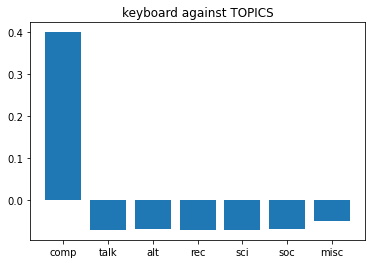

In [176]:
plt.title(f"{word} against TOPICS")
plt.bar(relation.index, relation)
plt.show()

In [ ]:
#find if U

78.57
71.24000000000001
67.675
80.095
81.67
39.2
80.39500000000001
82.87
79.52
79.52
79.52
79.52
